# Machine Learning By Example

The first thing we want to do is import the basic Python packages such as _NumPy_, _Matplotlib_ and _Pandas_.

In [1]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

# Configuration

Configure the data file that will used in this interactive tutorial. For now, this tutorial expects a CSV file but can easily be up dated to accomodate other data sources and file formats.

In [2]:
# data_file    = 'cardiacData.csv'
# data_columns = [ 'HR', 'Att', 'STE', 'Age', 'Outcome' ]
# data_header  = -1
data_file    = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data_columns = [ 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class' ]
data_header  = None

# Import Data

Here we import the data into a Pandas _Data Frame_ which will be used to process going forward.

In [3]:
file_data = pd.read_csv(data_file, header = data_header, names = data_columns)
df = pd.DataFrame(file_data)

# Understanding The Data

## File Metadata

Looking at the data types int he file will help us understand the file format. If we notice a column or _Feature_, that we want to include in our data set that is non-numeric, for example, we will want to convert that to a numeric data type when we begin _Feature Engineering_ (pre-processing our data).

In [4]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

## Data Sample

In [5]:
pd.set_option('display.max_rows', 5)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
...,...,...,...,...,...,...,...,...,...
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Describing the Data

Describing the data will show any values that have a range outside of the normal distribution. These can be standardized using a _ZScore_ for example.

In [6]:
# Reset max_rows to all rows
pd.set_option('display.max_rows', None)
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualizing the Data

Visualizing the data is key to helping understand the makeup of the data and it's attributes (Feature Vectors). This helps to find ways to tune the model as well as outliers or data that may need standardized.

## Histograms

A fast way to get an idea of the shape of the data, which is to say, the distribution (or density) of each _feature_ is to look at histograms.

Histograms represent the distribution of a continuous variable (_feature_ in this case) over a given interval or period of time. Histograms plot the data by dividing it into intervals called _bins_. It is used to inspect the underlying frequency distribution or shape of the data Gaussian (eg. Normal distribution), outliers, skewness, etc. 

[Types of distributions](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)

**_TIP_**: Guassian distributions are preferred to work with since data tends to cluster at a given point.

**Choosing a Bin Number**

Setting bins to a higher or lower number will yeild denser or sparser results. The choice of bin width significantly affects the resulting plot. Smaller binwidths can make the plot cluttered, but larger binwidths may obscure nuances in the data.

_Matplotlib_ will automatically choose a reasonable binwidth for you, but you can specify the binwidth yourself after trying out several values. There is no true right or wrong answer, you just have to try different bin values and see which works best for your particular data.

**_TIP_**: If you have a small amount of data, use wider bins to eliminate noise. If you have a lot of data, use narrower bins because the histogram will not be that noisy.

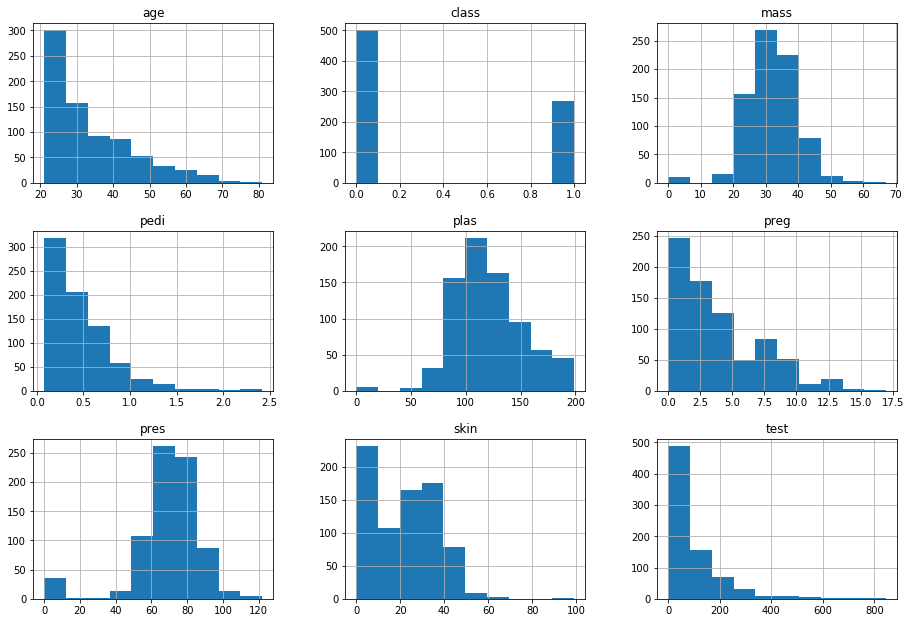

In [7]:
# Using the Data Frame we will produce histograms of each attribute
# with an optional specified number of bins. Matplotlib will automatically
# choose a reasonable binwidth for you if set to None.
df.hist(histtype = 'bar', bins = 10)
plt.subplots_adjust(left = 3, bottom = 10, right = 5, top = 12, wspace = None, hspace = None)
plt.show()

## Density Plots

Histograms are a great way to start exploring a single _feature_ drawn from one category. However, when we want to compare the distributions of one _feature_ across multiple categories, histograms have issues with readability.

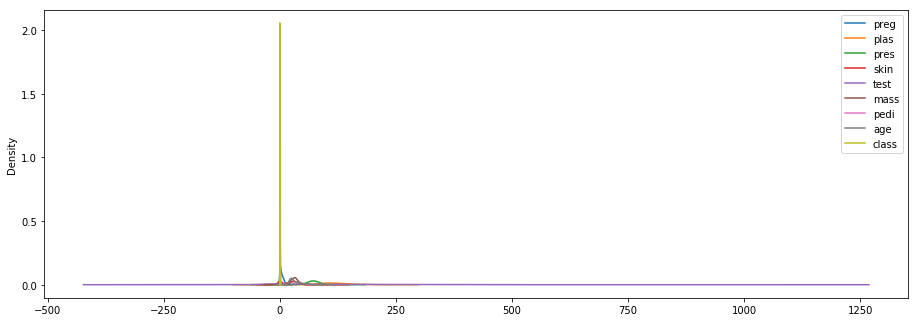

In [8]:
df.plot.density()
plt.subplots_adjust(left = 3, bottom = 4, right = 5, top = 5, wspace = None, hspace = None)
plt.show()

## Box-And-Whisker Plot

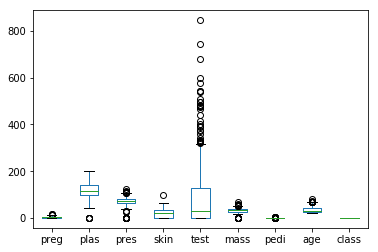

In [9]:
df.plot(kind = 'box')
plt.show()

## Scatter Matrix

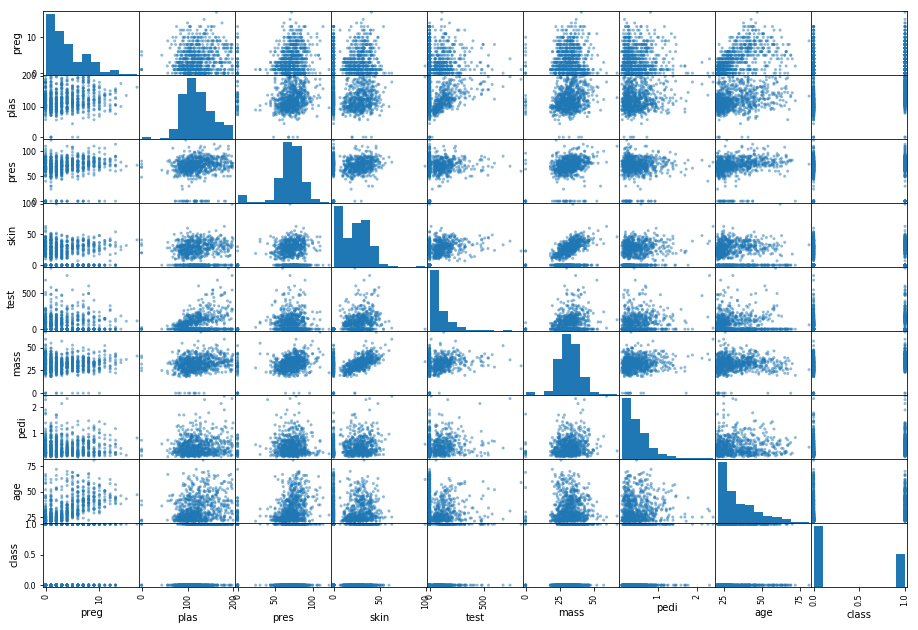

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.subplots_adjust(left = 3, bottom = 10, right = 5, top = 12, wspace = None, hspace = None)
plt.show()

# Feature Engineering

# Clustering

Clustering, in Machine Learning, is the assignment of a set of observations into subsets (called clusters) so that observations in the same cluster are similar in some sense. Clustering is a method of unsupervised learning, and a common technique for statistical data analysis used in many fields. Clustering is an optimization problem. Need to identify the best cluster of Features. 

When given unlabeled data we need to try and find clusters of examples near each other.
When given labeled data we need identify the mathematical service that best separates the labeled examples. However, this is subject to constraints to avoid overfitting. 

Learned models (clusters) will depend on certain constraints:
* The distance metric between examples (Minkowski + Linkage)
* Choice of Feature vectors
* Constraints on the complexity of the model to avoid overfitting (each Example is its own cluster):
* The specified number of clusters (k)
* Complexity of the separating surface

# K-Means Clustering

_K-means_ is an unsupervised machine learning algorithm (data is labeled) that groups a dataset into a user-specified number of clusters (_k_). This algorithm is somewhat naive- as it clusters the data into a user specified _k_ clusters, even if _k_ is not the right number of clusters to use. Therefore, it is sometimes a challenge to find the optimal value for _k_. An optimial _k_ is one where increasing _k_ doesn't give much better model of the data.

## Finding K

There are different ways to choose a number of clusters (K):

* Have a priori knowledge about the application domain.
* Use Hierarchical clustering on a subset of data.
* Try different values of k and evaluate quality of results (dissimilarity).
* Using algorithms such as Elbow

### Elbow Method (Sum of Squared Errors)

This method looks at the percentage of variance explained as a function of the number of clusters. Achieving this yeilds and optimal value for _k_.

The idea of the elbow method is to run K-Means clustering on the dataset for a range of values of _k_ (_k_ from 1 to 10 for example). Then, for each value of _k_, calculate the _Sum of Squared Errors (SSE)_ or _Within Cluster Sum of Squares (WCSS)_.

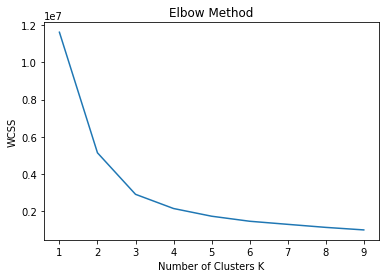

In [11]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []
samples = 10

# Try different values for k and record the results.
for k in range(1, samples):
    kmeans = KMeans(k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(file_data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, samples), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('WCSS') # Within Cluster Sum of Squares
plt.show()

# Measuring Model Accuracy